# **Implementing and Analyzing K-Means Clustering on Synthetic Data**

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

- **NumPy** is utilized for numerical computation and array manipulation.
- **Pandas** is utilized for data manipulation in DataFrame structures.
- **Matplotlib** is utilized for creating graphs and visualizations.
- **make_blobs** from scikit-learn is utilized for creating a synthetic dataset with well-defined clusters.
- **silhouette_score** is utilized for determining the quality of clustering.

## Genrating Synthetic Dataset

In [2]:
x,y_true = make_blobs(
    n_samples=600,
    centers=4,
    n_features=4,
    cluster_std=1.2,
    random_state=42
)
df = pd.DataFrame(x, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4
0,-7.086780,-5.819718,-8.055540,5.431852
1,-7.298010,-7.299219,-9.224290,9.815620
2,-6.729358,-7.395396,-8.691571,7.975481
3,1.288177,4.117007,-10.103473,8.567292
4,2.668256,5.448460,-10.026253,8.391145


This class applies the K-Means clustering algorithm without resorting to the built-in clustering functions.

Major steps:
- Initialize centroids randomly.
- Assign each data point to the closest centroid.
- Update centroids by averaging assigned points.
- Repeat until convergence or reaching the maximum number of iterations.

## Implement K-Means From Scratch

In [10]:
class KMeansScratch:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        np.random.seed(42)
        self.centroids = X[np.random.choice(len(X), self.k, replace=False)]

        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:, None] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            new_centroids = np.array([
                X[self.labels == i].mean(axis=0)
                for i in range(self.k)
            ])

            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return self.labels


### K-Means `fit()` Method Explanation

- The initial centroids are chosen randomly from the data set.
- The Euclidean distance is computed between each data point and all centroids.
- Each data point is assigned to the closest centroid.
- The centroids are updated as the mean of all points assigned to them.
- The algorithm terminates when the centroids do not change significantly.

## Elbow Method (Inertia Calculation)

In [4]:
def calculate_inertia(x, labels, centroids):
    inertia = 0
    for i in range(len(centroids)):
        inertia +=np.sum((x[labels == 1] - centroids[i]) ** 2)
    return inertia

### Elbow Method for Optimal K Selection

Elbow Method is employed to find the optimal number of clusters.

Steps:
- Apply K-Means clustering for different values of K.
- Calculate the inertia for each value of K.
- Plot a graph of K vs. inertia.
- The point at which the rate of decrease of inertia slows down is called the “elbow”.

In [13]:
inertias = []
K_range = range(2, 8)

for k in K_range:
    km = KMeansScratch(k)
    labels = km.fit(x)
    inertia = calculate_inertia(x, labels, km.centroids)
    inertias.append(inertia)


### Elbow Method for Optimal K Selection

Elbow Method is employed to find the optimal number of clusters.

Steps:
- Apply K-Means clustering for different values of K.
- Calculate the inertia for each value of K.
- Plot a graph of K vs. inertia.
- The point at which the rate of decrease of inertia slows down is called the “elbow”.

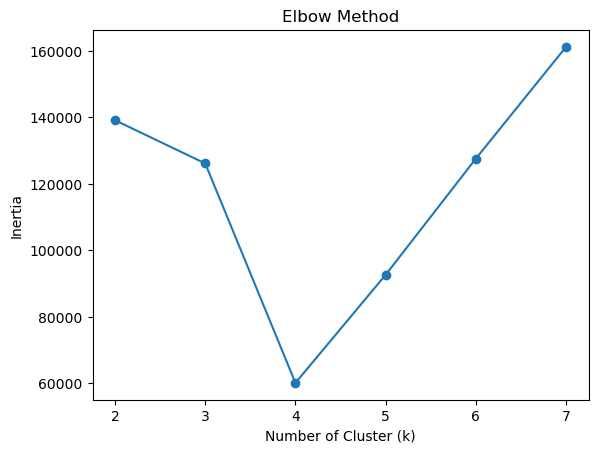

In [17]:
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

### Elbow observed at K = 4

# Silhouette Score Evaluation

In [18]:
sil_scores = []

for k in K_range:
	km = KMeansScratch(k)
	labels = km.fit(x)
	sil_score = silhouette_score(x, labels)
	sil_scores.append(sil_score)

### Analysis of Silhouette Score

The Silhouette Score is a measure of how well clusters are formed by considering the following aspects:
- The distance of points within a cluster (cohesion).
- The distance of points from other clusters (separation).

The Silhouette Score always lies between -1 and 1. A higher score indicates well-separated clusters.

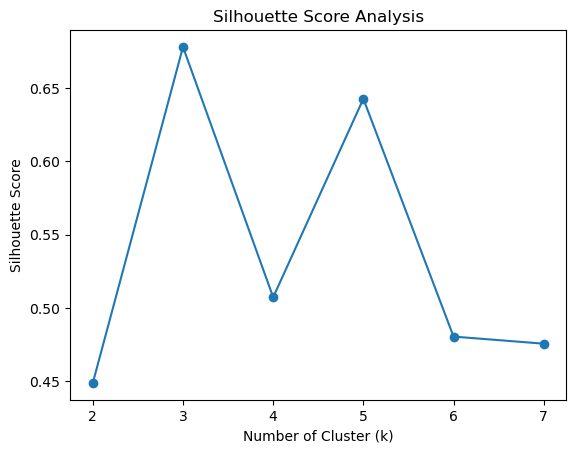

In [19]:
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Number of Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

### Highest Silhouette Score at K = 4

## Final K-Means Model with Optimal K

The final K-Means model is developed using the optimal value of K.

- This model achieves the optimal trade-off between cluster compactness and separation.
- The final cluster labels are obtained using this model.

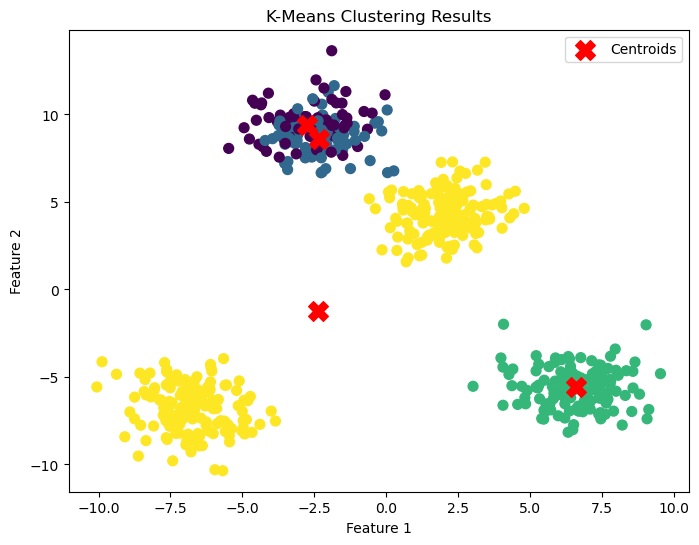

In [23]:
# Train final K-Means model with optimal k=4
kmeans_final = KMeansScratch(k=4)
final_labels = kmeans_final.fit(x)

plt.figure(figsize=(8, 6))
plt.scatter(
    df["Feature 1"],
    df["Feature 2"],
    c=final_labels,
    cmap='viridis',
    s=50
)
plt.scatter(
    kmeans_final.centroids[:, 0],
    kmeans_final.centroids[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroids'
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

### Cluster Visualization

The clusters are visualized using a 2D scatter plot based on the most informative features.

- The clusters are represented using different colors.
- The centroids are marked for better clarity.
- The visualization allows for the understanding of the separation and structure of the clusters.

## **Final Analysis**
### Cluster Interpretation

- The K-Means algorithm was able to effectively cluster the synthetic dataset into **four distinct clusters**.
- Each cluster holds a group of data points that exhibit similar patterns in the original feature space.
- The clusters have very little overlap, which is a sign of effective clustering performance.

### Why K = 4 is Optimal

- The **Elbow Method** demonstrates a steep drop in inertia until **K = 4**, beyond which the gains are marginal.
- The **Silhouette Score** attains its maximum value at **K = 4**, which is a sign of strong intra-cluster cohesion and inter-cluster separation.
- Both of these evaluation criteria demonstrate that **K = 4** is the optimal choice for this dataset.